# Name : Maria Anson
## NUID : 002931419

For this exercise, use Scikit-Learn in Python. 
Download the dataset of the HW02 from piazza. The dataset is in Matlab format (.mat); 

You can use scipy.io.savemat to convert it to python format (.npy). There are 126 training and 14 test samples, each being a two-dimensional feature vector. There are two classes (0 and 1).

## Loading the libraries

In [1]:
import scipy.io
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

## Loading the data

In [2]:
file = scipy.io.loadmat('hw02_dataset.mat')

In [3]:
X_train = file['X_trn']
y_train = file['Y_trn']
X_test = file['X_tst']
y_test = file['Y_tst']

In [4]:
print(f"The dimension of the training dataset is {X_train.shape} with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"The dimension of the training truth label is {y_train.shape} with {y_train.shape[0]} rows")
print(f"The dimension of the testing dataset is {X_test.shape} with {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"The dimension of the testing truth label is {y_test.shape} with {y_test.shape[0]} rows")

The dimension of the training dataset is (126, 2) with 126 rows and 2 columns
The dimension of the training truth label is (126, 1) with 126 rows
The dimension of the testing dataset is (14, 2) with 14 rows and 2 columns
The dimension of the testing truth label is (14, 1) with 14 rows


Write down a code in Python (that uses logistic regression in Scikit-Learn) whose inputs are a training dataset and a test dataset and its output is the classification error on the test set.

## Training the model

In [5]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train.reshape(-1))

LogisticRegression()

Report the classification error on the test set of the dataset used in the previous question.Report the classification error on the test set of the dataset used in the previous question.

In [7]:
def classification_error(actual, prediction):
    false_positive = actual[actual!=prediction]
    return np.round(len(false_positive)/len(actual),8)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("The classification error of the model on the training data is ", classification_error(y_train, train_pred))
print("The classification error of the model on the testing data is ", classification_error(y_test, test_pred))

The classification error of the model on the training data is  0.03174603
The classification error of the model on the testing data is  0.07142857


In [8]:
def mean_squared_error(true_value, prob):
    return np.round(np.average((true_value - prob)**2),8)

print("The trained logisitc regression model has a test mean squared error of ", 
      mean_squared_error(model.predict_proba(X_test)[:,1], y_test))

print("The trained logisitc regression model has a train mean squared error of ", 
      mean_squared_error(model.predict_proba(X_train)[:,1], y_train))

The trained logisitc regression model has a test mean squared error of  0.02657104
The trained logisitc regression model has a train mean squared error of  0.0256866


Plot the data (use different colors for data in different classes) and plot the decision boundary found by the logistic regressions.

## Visualizing the model

In [9]:
neg_X_train = X_train[y_train==0]
pos_X_train = X_train[y_train==1]

neg_y_train = y_train[y_train==0]
pos_y_train = y_train[y_train==1]

neg_X_test = X_test[y_test==0]
pos_X_test = X_test[y_test==1]

neg_y_test = y_test[y_test==0]
pos_y_test = y_test[y_test==1]

### We can think of the decision boundary as Feature2 = m*Feature1 + c 
### i.e (x2 = m*x1 + c)
### logistic eqn z = w1*x1 + w2*x2 + b 
#### If x1 = 0 -> x2 = c
logistic eqn - > z = 0 + w2*c + b

we know z=0 when y=0.5

-> 0 = 0 + w2*c + b

## c = -b/w2

To find slope, we can use -b/a which is 

## m = -w1/w2
    





In [10]:
b = model.intercept_[0]
w1, w2 = model.coef_[0]

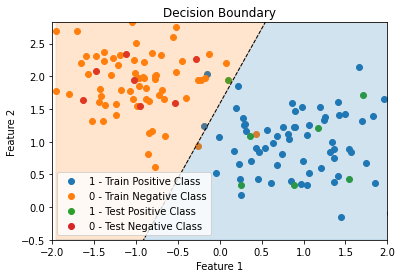

In [11]:
plt.scatter(x=pos_X_train[:,0], y=pos_X_train[:,1], label = '1 - Train Positive Class')
plt.scatter(x=neg_X_train[:,0], y=neg_X_train[:,1], label = '0 - Train Negative Class')
plt.scatter(x=pos_X_test[:,0], y=pos_X_test[:,1], label = '1 - Test Positive Class')
plt.scatter(x=neg_X_test[:,0], y=neg_X_test[:,1], label = '0 - Test Negative Class')


x1_min = X_train[:,0].min()
x1_max = X_train[:,0].max()
c = -b/w2
m = -w1/w2
x = np.array([x1_min, x1_max])
y = m*x + c
plt.plot(x, y, 'k', lw=1, ls='--')

plt.fill_between(x, y, -0.5, color='tab:blue', alpha=0.2)
plt.fill_between(x, y, X_train[:,1].max(), color='tab:orange', alpha=0.2)

plt.xlabel('Feature 1')
plt.xlim(-2,2)
plt.ylim(-0.5, X_train[:,1].max())
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()

Report the train and test classification accuracies (percentage of samples in the train- ing/testing set that get classified correctly using the learned logistic regression model).


## Testing the model

In [12]:
def accuracy(true_label, prediction_label):
    true_positive = true_label[true_label == prediction_label]
    return np.round(len(true_positive)/len(true_label),8)

In [13]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("The classification accuracy of the model on the training data is ", accuracy(y_train, train_pred))
print("The classification accuracy of the model on the testing data is ", accuracy(y_test, test_pred))

The classification accuracy of the model on the training data is  0.96825397
The classification accuracy of the model on the testing data is  0.92857143


In [14]:
## Brief summary of performance
print("Training Performance\n")
print(metrics.classification_report(y_train, train_pred))
print("=====================================================\nTesting Performance\n")
print(metrics.classification_report(y_test, test_pred))

Training Performance

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.97      0.97      0.97        63

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126

Testing Performance

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.86      0.92         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14

